In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Flight.xlsx')
df

,Unnamed: 0,airline,source,destination,deptime,arrivtime,stops,duration,date,price
0,0,Air Asia,New Delhi,Bangalore,15:40,20:35,1 Stop,4h 55m,30/10/2021,"7,423"
1,1,Air Asia,New Delhi,Bangalore,12:40,18:20,1 Stop,5h 40m,30/10/2021,"7,423"
2,2,Air Asia,New Delhi,Bangalore,14:30,20:35,1 Stop,6h 05m,30/10/2021,"7,423"
3,3,Air Asia,New Delhi,Bangalore,11:55,18:20,1 Stop,6h 25m,30/10/2021,"7,423"
4,4,Air Asia,New Delhi,Bangalore,07:10,13:55,1 Stop,6h 45m,30/10/2021,"7,423"
...,...,...,...,...,...,...,...,...,...,...
17668,5658,Air India,Jaipur,New Delhi,10:15,20:35,1 Stop,10h 20m,1/11/2021,"17,816"
17669,5659,Air India,Jaipur,New Delhi,14:00,20:30,1 Stop,6h 30m,1/11/2021,"20,756"
17670,5660,Air India,Jaipur,New Delhi,14:00,10:15,1 Stop,20h 15m,1/11/2021,"20,756"
17671,5661,Air India,Jaipur,New Delhi,14:00,12:15,1 Stop,22h 15m,1/11/2021,"20,756"


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17673 entries, 0 to 17672
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      17673 non-null  object
 1   source       17673 non-null  object
 2   destination  17673 non-null  object
 3   deptime      17673 non-null  object
 4   arrivtime    17673 non-null  object
 5   stops        17673 non-null  object
 6   duration     17673 non-null  object
 7   date         17673 non-null  object
 8   price        17673 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


In [5]:
df.describe

<bound method NDFrame.describe of          airline     source destination deptime arrivtime      stops duration  \
0       Air Asia  New Delhi   Bangalore   15:40     20:35     1 Stop   4h 55m   
1       Air Asia  New Delhi   Bangalore   12:40     18:20     1 Stop   5h 40m   
2       Air Asia  New Delhi   Bangalore   14:30     20:35     1 Stop   6h 05m   
3       Air Asia  New Delhi   Bangalore   11:55     18:20     1 Stop   6h 25m   
4       Air Asia  New Delhi   Bangalore   07:10     13:55     1 Stop   6h 45m   
...          ...        ...         ...     ...       ...        ...      ...   
17668  Air India     Jaipur   New Delhi   10:15     20:35     1 Stop  10h 20m   
17669  Air India     Jaipur   New Delhi   14:00     20:30     1 Stop   6h 30m   
17670  Air India     Jaipur   New Delhi   14:00     10:15     1 Stop  20h 15m   
17671  Air India     Jaipur   New Delhi   14:00     12:15     1 Stop  22h 15m   
17672  Air India     Jaipur   New Delhi   14:00     19:20  2 Stop(s)  29h 2

In [6]:
df.shape

(17673, 9)

In [7]:
df.columns

Index(['airline', 'source', 'destination', 'deptime', 'arrivtime', 'stops',
       'duration', 'date', 'price'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
for i in ['airline', 'source', 'destination', 'deptime', 'arrivtime', 'stops',
       'duration', 'date', 'price']:
    print(i,";-",len(df[i].value_counts()))

airline ;- 8
source ;- 10
destination ;- 10
deptime ;- 248
arrivtime ;- 262
stops ;- 5
duration ;- 436
date ;- 3
price ;- 4624


In [9]:
df.isnull().sum()

airline        0
source         0
destination    0
deptime        0
arrivtime      0
stops          0
duration       0
date           0
price          0
dtype: int64

<AxesSubplot:>

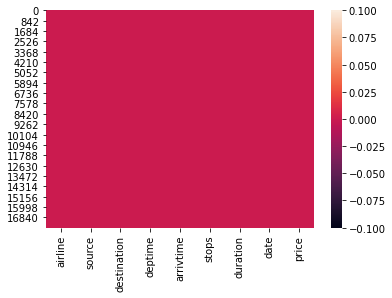

In [10]:
sns.heatmap(df.isnull())

In [11]:
d = pd.to_datetime(df['date']).dt.day
m = pd.to_datetime(df['date']).dt.month
y = pd.to_datetime(df['date']).dt.year

In [12]:
new_df={}
new_df['Day']=d
new_df['Month']=m
new_df['Year']=y
tst=pd.DataFrame(new_df)

I Separated  Date_of_Journey column in 3 Different columns

In [13]:
df1=pd.concat([df,tst],axis=1)
df1

,airline,source,destination,deptime,arrivtime,stops,duration,date,price,Day,Month,Year
0,Air Asia,New Delhi,Bangalore,15:40,20:35,1 Stop,4h 55m,30/10/2021,"7,423",30,10,2021
1,Air Asia,New Delhi,Bangalore,12:40,18:20,1 Stop,5h 40m,30/10/2021,"7,423",30,10,2021
2,Air Asia,New Delhi,Bangalore,14:30,20:35,1 Stop,6h 05m,30/10/2021,"7,423",30,10,2021
3,Air Asia,New Delhi,Bangalore,11:55,18:20,1 Stop,6h 25m,30/10/2021,"7,423",30,10,2021
4,Air Asia,New Delhi,Bangalore,07:10,13:55,1 Stop,6h 45m,30/10/2021,"7,423",30,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
17668,Air India,Jaipur,New Delhi,10:15,20:35,1 Stop,10h 20m,1/11/2021,"17,816",11,1,2021
17669,Air India,Jaipur,New Delhi,14:00,20:30,1 Stop,6h 30m,1/11/2021,"20,756",11,1,2021
17670,Air India,Jaipur,New Delhi,14:00,10:15,1 Stop,20h 15m,1/11/2021,"20,756",11,1,2021
17671,Air India,Jaipur,New Delhi,14:00,12:15,1 Stop,22h 15m,1/11/2021,"20,756",11,1,2021


In [14]:
df1['Year'].unique()

array([2021], dtype=int64)

In [15]:
h=pd.to_datetime(df['arrivtime']).dt.hour
m=pd.to_datetime(df['arrivtime']).dt.minute
h1=pd.to_datetime(df['deptime']).dt.hour
m2=pd.to_datetime(df['deptime']).dt.minute

Separation of Arrival & Dep_Time to hour,minute,day,month

In [16]:
new_df2={}
new_df2['Hour']=h
new_df2['Minute']=m
new_df2['Dept_Hour']=h1
new_df2['Dept_Minute']=m2
t1=pd.DataFrame(new_df2)

In [17]:
df2=pd.concat([df1,t1],axis=1)
df2

,airline,source,destination,deptime,arrivtime,stops,duration,date,price,Day,Month,Year,Hour,Minute,Dept_Hour,Dept_Minute
0,Air Asia,New Delhi,Bangalore,15:40,20:35,1 Stop,4h 55m,30/10/2021,"7,423",30,10,2021,20,35,15,40
1,Air Asia,New Delhi,Bangalore,12:40,18:20,1 Stop,5h 40m,30/10/2021,"7,423",30,10,2021,18,20,12,40
2,Air Asia,New Delhi,Bangalore,14:30,20:35,1 Stop,6h 05m,30/10/2021,"7,423",30,10,2021,20,35,14,30
3,Air Asia,New Delhi,Bangalore,11:55,18:20,1 Stop,6h 25m,30/10/2021,"7,423",30,10,2021,18,20,11,55
4,Air Asia,New Delhi,Bangalore,07:10,13:55,1 Stop,6h 45m,30/10/2021,"7,423",30,10,2021,13,55,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17668,Air India,Jaipur,New Delhi,10:15,20:35,1 Stop,10h 20m,1/11/2021,"17,816",11,1,2021,20,35,10,15
17669,Air India,Jaipur,New Delhi,14:00,20:30,1 Stop,6h 30m,1/11/2021,"20,756",11,1,2021,20,30,14,0
17670,Air India,Jaipur,New Delhi,14:00,10:15,1 Stop,20h 15m,1/11/2021,"20,756",11,1,2021,10,15,14,0
17671,Air India,Jaipur,New Delhi,14:00,12:15,1 Stop,22h 15m,1/11/2021,"20,756",11,1,2021,12,15,14,0


In [18]:
df2.drop(['date','arrivtime','Year','deptime'],axis=1,inplace=True)

In [19]:
df2

,airline,source,destination,stops,duration,price,Day,Month,Hour,Minute,Dept_Hour,Dept_Minute
0,Air Asia,New Delhi,Bangalore,1 Stop,4h 55m,"7,423",30,10,20,35,15,40
1,Air Asia,New Delhi,Bangalore,1 Stop,5h 40m,"7,423",30,10,18,20,12,40
2,Air Asia,New Delhi,Bangalore,1 Stop,6h 05m,"7,423",30,10,20,35,14,30
3,Air Asia,New Delhi,Bangalore,1 Stop,6h 25m,"7,423",30,10,18,20,11,55
4,Air Asia,New Delhi,Bangalore,1 Stop,6h 45m,"7,423",30,10,13,55,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...
17668,Air India,Jaipur,New Delhi,1 Stop,10h 20m,"17,816",11,1,20,35,10,15
17669,Air India,Jaipur,New Delhi,1 Stop,6h 30m,"20,756",11,1,20,30,14,0
17670,Air India,Jaipur,New Delhi,1 Stop,20h 15m,"20,756",11,1,10,15,14,0
17671,Air India,Jaipur,New Delhi,1 Stop,22h 15m,"20,756",11,1,12,15,14,0


In [20]:
# df['Dur'] = (pd.to_timedelta(df['Duration']).dt.seconds // 3600).astype(str) 
df['Dur_Minute']=(pd.to_timedelta(df['duration']).dt.seconds // 60).astype(int) 

In [21]:
# df2['Time_Delta']=pd.to_timedelta(df['Duration'])
# df2.drop('Duration',axis=1,inplace=True)

In [22]:
df5=pd.concat([df2,df['Dur_Minute']],axis=1)
df5.drop('duration',axis=1,inplace=True)

In [23]:
df5.head(5)

,airline,source,destination,stops,price,Day,Month,Hour,Minute,Dept_Hour,Dept_Minute,Dur_Minute
0,Air Asia,New Delhi,Bangalore,1 Stop,"7,423",30,10,20,35,15,40,295
1,Air Asia,New Delhi,Bangalore,1 Stop,"7,423",30,10,18,20,12,40,340
2,Air Asia,New Delhi,Bangalore,1 Stop,"7,423",30,10,20,35,14,30,365
3,Air Asia,New Delhi,Bangalore,1 Stop,"7,423",30,10,18,20,11,55,385
4,Air Asia,New Delhi,Bangalore,1 Stop,"7,423",30,10,13,55,7,10,405


Finally I splitted columns into category wise

In [24]:
df5.dtypes

airline        object
source         object
destination    object
stops          object
price          object
Day             int64
Month           int64
Hour            int64
Minute          int64
Dept_Hour       int64
Dept_Minute     int64
Dur_Minute      int32
dtype: object

In [25]:
# df5['price']=df5['price'].replace(',','', regex=True, inplace=True)

In [26]:
# df5.head(4)

In [27]:
# c = df.select_dtypes(object).columns
# df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [28]:
# df2['price']=df2['price'].replace(',','',inplace=True)

In [29]:
# df2.head()

In [30]:
df5['price'].astype('str')

0         7,423
1         7,423
2         7,423
3         7,423
4         7,423
          ...  
17668    17,816
17669    20,756
17670    20,756
17671    20,756
17672    20,756
Name: price, Length: 17673, dtype: object

In [31]:
df5['price']=df5['price'].str.replace(',','')

In [32]:
df5['price']=df5['price'].astype('int')

In [33]:
df5.select_dtypes('O')

,airline,source,destination,stops
0,Air Asia,New Delhi,Bangalore,1 Stop
1,Air Asia,New Delhi,Bangalore,1 Stop
2,Air Asia,New Delhi,Bangalore,1 Stop
3,Air Asia,New Delhi,Bangalore,1 Stop
4,Air Asia,New Delhi,Bangalore,1 Stop
...,...,...,...,...
17668,Air India,Jaipur,New Delhi,1 Stop
17669,Air India,Jaipur,New Delhi,1 Stop
17670,Air India,Jaipur,New Delhi,1 Stop
17671,Air India,Jaipur,New Delhi,1 Stop


In [34]:
df3=pd.get_dummies(df5,columns=(['airline','source','destination','stops']))

In [35]:
df3.head(5)

,price,Day,Month,Hour,Minute,Dept_Hour,Dept_Minute,Dur_Minute,airline_Air Asia,airline_Air India,...,destination_Kolkata,destination_Lucknow,destination_Mumbai,destination_New Delhi,destination_Pune,stops_1 Stop,stops_2 Stop(s),stops_3 Stop(s),stops_4 Stop(s),stops_Non Stop
0,7423,30,10,20,35,15,40,295,1,0,...,0,0,0,0,0,1,0,0,0,0
1,7423,30,10,18,20,12,40,340,1,0,...,0,0,0,0,0,1,0,0,0,0
2,7423,30,10,20,35,14,30,365,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7423,30,10,18,20,11,55,385,1,0,...,0,0,0,0,0,1,0,0,0,0
4,7423,30,10,13,55,7,10,405,1,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
df3.dtypes

price                    int32
Day                      int64
Month                    int64
Hour                     int64
Minute                   int64
Dept_Hour                int64
Dept_Minute              int64
Dur_Minute               int32
airline_Air Asia         uint8
airline_Air India        uint8
airline_Go First         uint8
airline_IndiGo           uint8
airline_SpiceJet         uint8
airline_StarAir          uint8
airline_TruJet           uint8
airline_Vistara          uint8
source_Bangalore         uint8
source_Chennai           uint8
source_Goa               uint8
source_Hyderabad         uint8
source_Jaipur            uint8
source_Kolkata           uint8
source_Lucknow           uint8
source_Mumbai            uint8
source_New Delhi         uint8
source_Pune              uint8
destination_Bangalore    uint8
destination_Chennai      uint8
destination_Goa          uint8
destination_Hyderabad    uint8
destination_Jaipur       uint8
destination_Kolkata      uint8
destinat

In [37]:
df3.isnull().sum()

price                    0
Day                      0
Month                    0
Hour                     0
Minute                   0
Dept_Hour                0
Dept_Minute              0
Dur_Minute               0
airline_Air Asia         0
airline_Air India        0
airline_Go First         0
airline_IndiGo           0
airline_SpiceJet         0
airline_StarAir          0
airline_TruJet           0
airline_Vistara          0
source_Bangalore         0
source_Chennai           0
source_Goa               0
source_Hyderabad         0
source_Jaipur            0
source_Kolkata           0
source_Lucknow           0
source_Mumbai            0
source_New Delhi         0
source_Pune              0
destination_Bangalore    0
destination_Chennai      0
destination_Goa          0
destination_Hyderabad    0
destination_Jaipur       0
destination_Kolkata      0
destination_Lucknow      0
destination_Mumbai       0
destination_New Delhi    0
destination_Pune         0
stops_1 Stop             0
s

In [38]:
df3.columns

Index(['price', 'Day', 'Month', 'Hour', 'Minute', 'Dept_Hour', 'Dept_Minute',
       'Dur_Minute', 'airline_Air Asia', 'airline_Air India',
       'airline_Go First', 'airline_IndiGo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_TruJet', 'airline_Vistara',
       'source_Bangalore', 'source_Chennai', 'source_Goa', 'source_Hyderabad',
       'source_Jaipur', 'source_Kolkata', 'source_Lucknow', 'source_Mumbai',
       'source_New Delhi', 'source_Pune', 'destination_Bangalore',
       'destination_Chennai', 'destination_Goa', 'destination_Hyderabad',
       'destination_Jaipur', 'destination_Kolkata', 'destination_Lucknow',
       'destination_Mumbai', 'destination_New Delhi', 'destination_Pune',
       'stops_1 Stop', 'stops_2 Stop(s)', 'stops_3 Stop(s)', 'stops_4 Stop(s)',
       'stops_Non Stop'],
      dtype='object')

<AxesSubplot:>

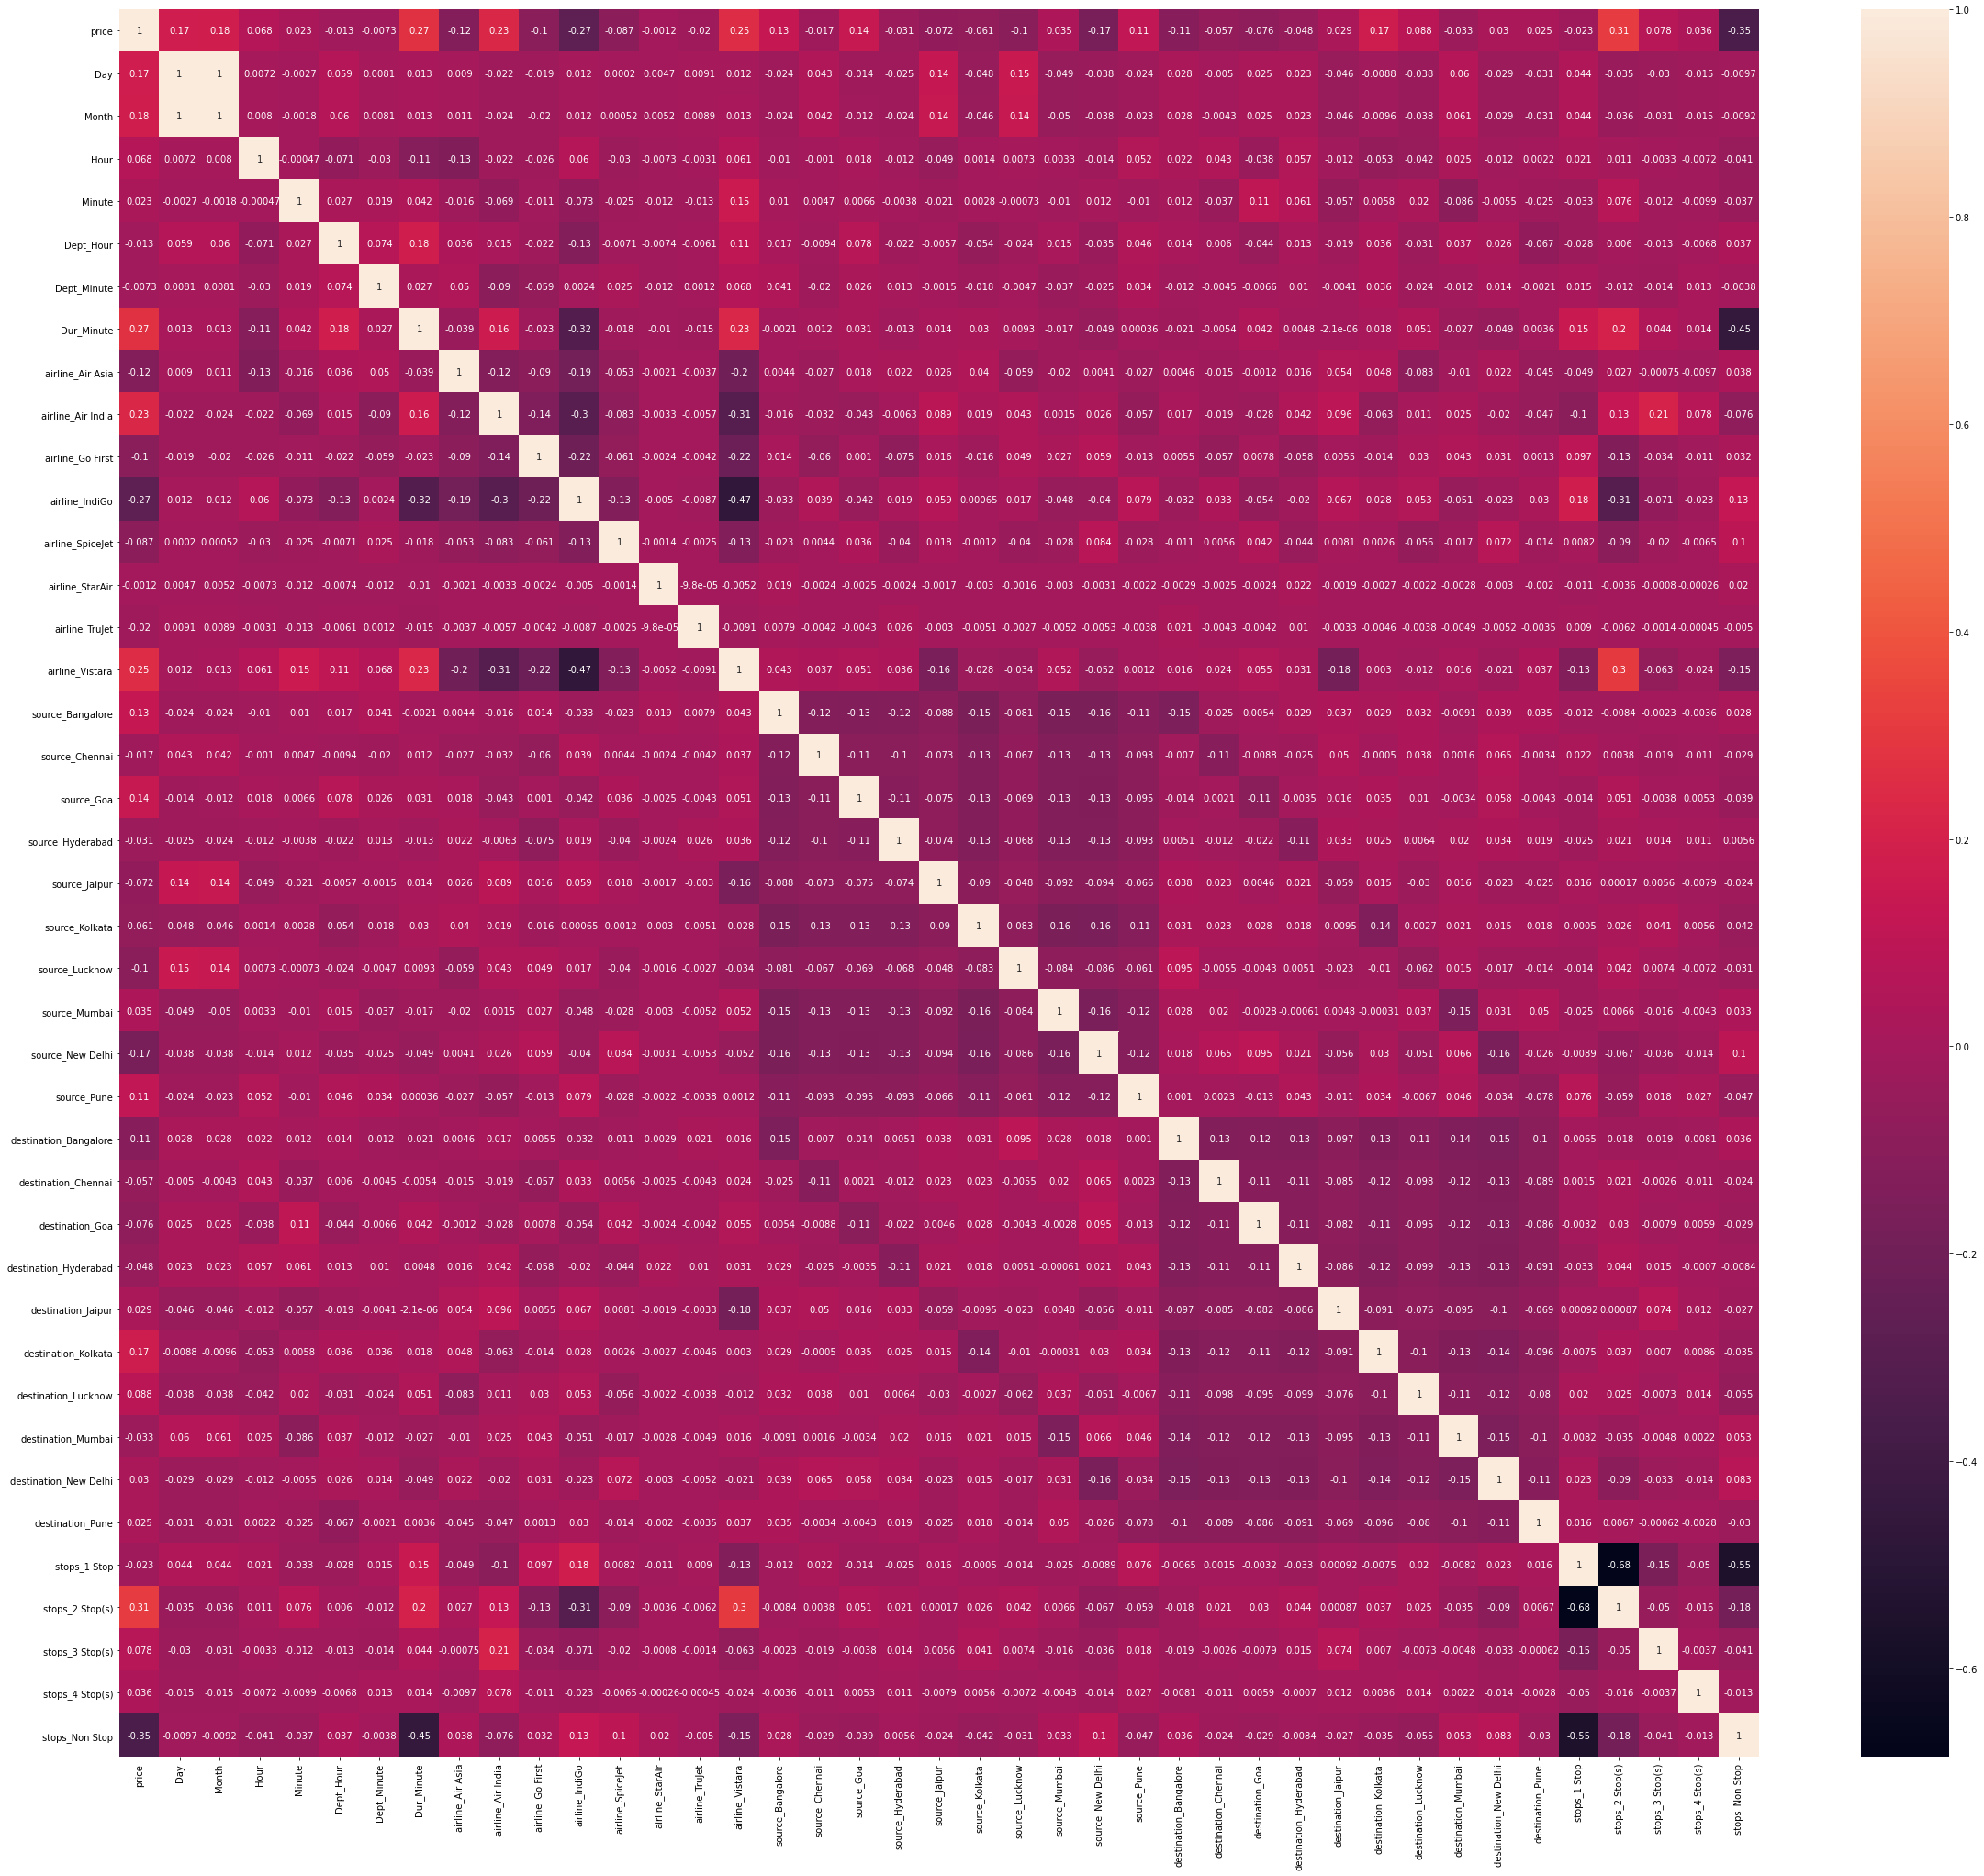

In [39]:
plt.figure(figsize=(40,35))
sns.heatmap(df3.corr(),annot=True)

In [40]:
for i in ['price', 'Day', 'Month', 'Hour', 'Minute', 'Dept_Hour', 'Dept_Minute',
       'Dur_Minute', 'airline_Air Asia', 'airline_Air India',
       'airline_Go First', 'airline_IndiGo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_TruJet', 'airline_Vistara',
       'source_Bangalore', 'source_Chennai', 'source_Goa', 'source_Hyderabad',
       'source_Jaipur', 'source_Kolkata', 'source_Lucknow', 'source_Mumbai',
       'source_New Delhi', 'source_Pune', 'destination_Bangalore',
       'destination_Chennai', 'destination_Goa', 'destination_Hyderabad',
       'destination_Jaipur', 'destination_Kolkata', 'destination_Lucknow',
       'destination_Mumbai', 'destination_New Delhi', 'destination_Pune',
       'stops_1 Stop', 'stops_2 Stop(s)', 'stops_3 Stop(s)', 'stops_4 Stop(s)',
       'stops_Non Stop']:
    print((i),len(df3[i].value_counts()))

price 4624
Day 3
Month 2
Hour 24
Minute 13
Dept_Hour 24
Dept_Minute 12
Dur_Minute 289
airline_Air Asia 2
airline_Air India 2
airline_Go First 2
airline_IndiGo 2
airline_SpiceJet 2
airline_StarAir 2
airline_TruJet 2
airline_Vistara 2
source_Bangalore 2
source_Chennai 2
source_Goa 2
source_Hyderabad 2
source_Jaipur 2
source_Kolkata 2
source_Lucknow 2
source_Mumbai 2
source_New Delhi 2
source_Pune 2
destination_Bangalore 2
destination_Chennai 2
destination_Goa 2
destination_Hyderabad 2
destination_Jaipur 2
destination_Kolkata 2
destination_Lucknow 2
destination_Mumbai 2
destination_New Delhi 2
destination_Pune 2
stops_1 Stop 2
stops_2 Stop(s) 2
stops_3 Stop(s) 2
stops_4 Stop(s) 2
stops_Non Stop 2


Value Counts of All Columns

In [41]:
df3.head(5)

,price,Day,Month,Hour,Minute,Dept_Hour,Dept_Minute,Dur_Minute,airline_Air Asia,airline_Air India,...,destination_Kolkata,destination_Lucknow,destination_Mumbai,destination_New Delhi,destination_Pune,stops_1 Stop,stops_2 Stop(s),stops_3 Stop(s),stops_4 Stop(s),stops_Non Stop
0,7423,30,10,20,35,15,40,295,1,0,...,0,0,0,0,0,1,0,0,0,0
1,7423,30,10,18,20,12,40,340,1,0,...,0,0,0,0,0,1,0,0,0,0
2,7423,30,10,20,35,14,30,365,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7423,30,10,18,20,11,55,385,1,0,...,0,0,0,0,0,1,0,0,0,0
4,7423,30,10,13,55,7,10,405,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
x=df3.drop('price',axis=1)

In [43]:
y=df3['price']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

best_state=0
accu=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=i)
    l = LinearRegression()
    l.fit(x_train,y_train)
    predictions = l.predict(x_test)
    accuracy=r2_score(y_test,predictions)
    if accuracy>accu:
        accu=accuracy
        best_state=i
print(f"Final accuracy is{accu} and best random state is {best_state}")

Final accuracy is0.49670581035275185 and best random state is 157


In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predictions))
print('Mean squared error:',mean_squared_error(y_test,predictions))

print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predictions)))    

error:
Mean absolute error: 3098.8009557291684
Mean squared error: 16446385.869049562
Root Mean Squared error: 4055.414389313324


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=30)

In [51]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# para={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
# rf=RandomForestRegressor()
# clf=GridSearchCV(rf,para)
# clf.fit(x_train,y_train)  
# print(clf.best_params_)

In [52]:
# rf=RandomForestRegressor(criterion='mae',max_features='auto')
# rf.fit(x_train,y_train)
# rf.score(x_train,y_train)
# pred=rf.predict(x_test)
# rfs=r2_score(y_test,pred) 
# print("R2 Score",rfs) 

In [53]:
# from sklearn.tree import DecisionTreeRegressor
# d=DecisionTreeRegressor()            #(criterion={"mse", "friedman_mse", "mae"},splitter={"best","random"})
# para={'criterion':["mse", "friedman_mse", "mae"],'splitter':["best","random"]}
# d=DecisionTreeRegressor()
# cl=GridSearchCV(d,para)
# cl.fit(x_train,y_train)
# print(cl.best_params_)

In [54]:
# d=DecisionTreeRegressor(criterion='mae',splitter='random')
# d.fit(x_train,y_train)
# pred=d.predict(x_test)
# dt=r2_score(y_test,pred)
# print(dt)